# Dibetes  Prediction





# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd

# Data Collection and Analysis



In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("diabetes.csv")

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0,33.6,0.627,50,1
1,1,85,66.0,29.0,0,26.6,0.351,31,0
2,8,183,64.0,0.0,0,23.3,0.672,32,1
3,1,89,66.0,23.0,94,28.1,0.167,21,0
4,0,137,40.0,35.0,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

# Checking Null values

In [5]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64

# Checking Duplicate values

In [6]:
diabetes_dataset.duplicated().sum()

0

In [7]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0,33.6,0.627,50,1
1,1,85,66.0,29.0,0,26.6,0.351,31,0
2,8,183,64.0,0.0,0,23.3,0.672,32,1
3,1,89,66.0,23.0,94,28.1,0.167,21,0
4,0,137,40.0,35.0,168,43.1,2.288,33,1


In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,767.000000,767.000000,768.000000,768.000000,767.000000,768.000000,768.000000
mean,3.845052,120.894531,69.119948,20.524120,79.799479,31.992578,0.471581,33.240885,0.348958
std,3.369578,31.972618,19.364275,15.958959,115.244002,7.884160,0.331444,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
import seaborn as sns

C:\Users\Darshan\AppData\Local\Temp\ipykernel_9928\2632577129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

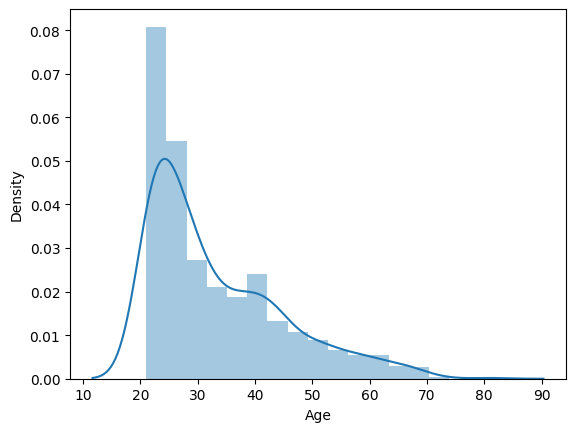

In [10]:
sns.distplot(diabetes_dataset['Age'])

In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.204409,19.643287,68.792000,30.304200,0.429196,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0        0  33.6   
1              1       85           66.0           29.0        0  26.6   
2              8      183           64.0            0.0        0  23.3   
3              1       89           66.0           23.0       94  28.1   
4              0      137           40.0           35.0      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0      180  32.9   
764            2      122           70.0           27.0        0  36.8   
765            5      121           72.0           23.0      112  26.2   
766            1      126           60.0            0.0        0  30.1   
767            1       93           70.0           31.0        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)

In [20]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14882723 ...  0.20401277  0.46921935
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16122389 ... -0.68442195 -0.36404393
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26457426 ... -1.10325546  0.60507749
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14882723 ... -0.73518964 -0.68406533
  -0.27575966]
 [-0.84488505  0.1597866  -0.47127501 ... -0.24020459 -0.37008207
   1.17073215]
 [-0.84488505 -0.8730192   0.04547686 ... -0.20212881 -0.47273044
  -0.87137393]]


In [21]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [22]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14882723 ...  0.20401277  0.46921935
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16122389 ... -0.68442195 -0.36404393
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26457426 ... -1.10325546  0.60507749
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14882723 ... -0.73518964 -0.68406533
  -0.27575966]
 [-0.84488505  0.1597866  -0.47127501 ... -0.24020459 -0.37008207
   1.17073215]
 [-0.84488505 -0.8730192   0.04547686 ... -0.20212881 -0.47273044
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

## Support Vector Machine(SVM)

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some sample data
X, y = make_classification(n_samples=100, n_features=4, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Define a classifier (RandomForestClassifier in this example)
classifier = RandomForestClassifier(random_state=42)

# Now train the classifier
classifier.fit(X_train_imputed, Y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [30]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9


## Decision Tree  Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier(criterion = "entropy", 
                                        splitter = "random", 
                                        max_depth = 10,
                                        min_samples_split = 3,
                                        min_samples_leaf = 6, 
                                        max_features = 5,
                                       random_state=200) 

In [34]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=6, min_samples_split=3,
                       random_state=200, splitter='random')

In [35]:
y_pred1 = dt.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(Y_test , y_pred1)

0.9

In [38]:
# Training Accuracy
dt.score(X_train,Y_train)

0.95

In [39]:
# testing Accuracay
dt.score(X_test,Y_test) 

0.9

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



## Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc=GradientBoostingClassifier()

In [44]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [45]:
y_pred3 = gbc.predict(X_test)

In [46]:
accuracy_score(Y_test , y_pred3)

0.9

In [47]:
# Training Accuracy
gbc.score(X_train,Y_train)

1.0

In [48]:
# testing Accuracay
gbc.score(X_test,Y_test) 

0.9

In [49]:
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



# Final 

In [50]:
final_data=pd.DataFrame({'Models':['SVM','DT','GB'],
                        'ACC':[test_data_accuracy,
                              accuracy_score(Y_test , y_pred1),
                              accuracy_score(Y_test , y_pred3)]})
                            
                            
                              

In [51]:
final_data

,Models,ACC
0,SVM,0.9
1,DT,0.9
2,GB,0.9


In [52]:
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns

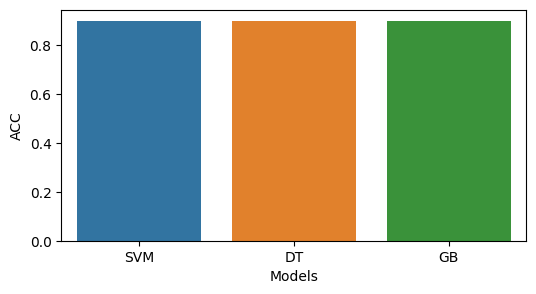

In [54]:
plt.figure(figsize=(6,3))
sns.barplot(x='Models',y='ACC',data = final_data)
plt.show()